# Семинар 1: линейная регрессия, обучение и валидация модели.


### 1. Вывод аналитической формулы весов 

Решите аналитически задачу минимизации функции потерь $Q(w)=(Xw-y)^T(Xw-y)$ в задаче линейной регрессии.

In [3]:
# надо минимизировать эту функцию, попробуем решить задачу аналитически:
# (((y-Xw)^T(y-Xw))'w= (y^T*y-y^TXw -(Xw)^T*y+(Xw)^T(Xw))'w= (y^T*y-y^TXw -(w^T*X^T*y)+w^T*X^T*Xw))'w = 0 - y^T*X-X^T*y+(X^T*X+X*X^T)*w= -2X^T*y+2X^TXw= -X^T*y+X^TXw=0
# X^TXw=X^Ty   w=(X^TX)^(-1)*X^T*y ОТВЕТ

### 2. Одномерная линейная регрессия

1. Выведите формулу обновления весов одномерной линейной регрессии методом градиентного спуска.

2. Напишите функцию, релизующую обучение одномерной линейной регрессии методом градиентного спуска.

In [112]:
def linear_regression(X, y_true, m=0, b=0, epochs=1000, learning_rate=0.0001): # epochs это кол-во итераций, learning rate коэф перед производной nabula, показывает шаг производной, обычно 10^-2 или 10^-3
    N = float(len(y_true))
    for i in range(epochs):
        y_pred = m * X + b
        cost = 1/N * sum((y_true - y_pred) ** 2) # 
        
        m_gradient = -2/N * sum(X @ (y_true - y_pred)) # np.dot(X, (y_true - y_pred))
        b_gradient = -2/N * sum(y_true - y_pred)
        
        m = m - learning_rate * m_gradient
        b = b - learning_rate * b_gradient
            
    return m, b, cost

## Сгенерируем точки для задачи регрессии

Populating the interactive namespace from numpy and matplotlib


array([ 0.9269815 ,  2.07480367,  1.49348543,  0.96021766,  2.13369765,
        0.88231092,  2.22341759,  2.36802408,  1.05453139,  1.96119928,
        1.56441051,  2.00014409,  1.13920443,  2.09443587,  2.68009632,
        2.0037191 ,  3.31218598,  1.69147493,  2.0453638 ,  2.67032671,
        3.04407522,  2.88405582,  3.83897331,  2.2023671 ,  3.81531981,
        2.37933091,  3.55149975,  4.19515726,  2.9944925 ,  3.16925916,
        4.30065044,  3.90799911,  3.40333159,  4.3491816 ,  3.59302574,
        4.54139531,  3.53984837,  3.96703655,  3.89385038,  5.01126871,
        4.39205422,  5.49523383,  5.23380739,  5.70532018,  5.6661656 ,
        4.3422036 ,  4.50518107,  4.60306562,  5.94880172,  5.5624834 ,
        5.33941736,  5.4499979 ,  6.50190157,  6.28103862,  6.26658378,
        6.66001673,  6.24823425,  6.77160256,  5.48456089,  7.35495409,
        5.53656297,  6.56481164,  6.3936809 ,  7.46386223,  6.07258863,
        6.74163427,  7.06753531,  6.97713606,  7.72966251,  6.39

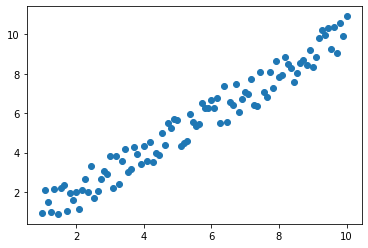

In [114]:
import random
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

num_points = 100
m, b, delta = 1, 0, 1

x = np.linspace(1, 10, num_points)
y = m * x + b + random.uniform(-delta, delta, num_points)

plt.scatter(x,y)
y

In [117]:
x

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

### Обучим нашу линейную регрессию и посмотрим на результат

MSE: 0.3451291414810655


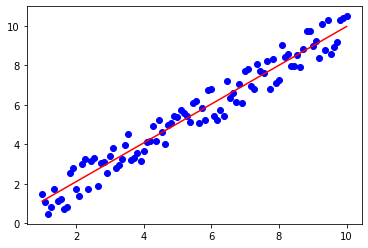

In [11]:
m, b, cost = linear_regression(x,y)

y_pred = m * x + b

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, 'r-')

print('MSE: {}'.format(cost))

# Задание 1

Поэкспериментируйте с количеством шагов (epochs) и learning rate.
Как меняется итоговая ошибка при фиксированном числе шагов и различных learning rate?

1) Постройте графики для learning rate = 0.1, 0.01, 0.0001 и epochs = 10, 100, 1000 (всего 9 графиков).
Рядом с каждым графиком выведите ошибку (cost).

2) Прокомментируйте каждый график: ответьте на вопрос, почему вы видите именно такую прямую?

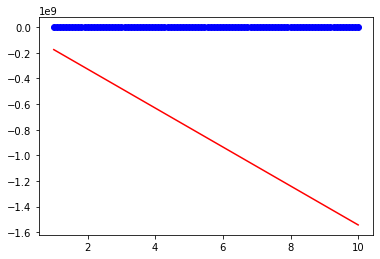

MSE: 2.064558432982806e+16
learning rate = 0.1 and epochs = 10


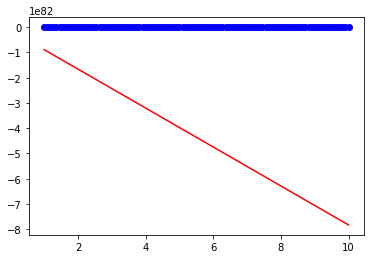

MSE: 5.319775325751314e+163
learning rate = 0.1 and epochs = 100


<ipython-input-9-faa940c7095e>:5: RuntimeWarning: overflow encountered in square
  cost = 1/N * sum((y_true - y_pred) ** 2) #
/Users/yanik/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-9-faa940c7095e>:7: RuntimeWarning: overflow encountered in matmul
  m_gradient = -2/N * sum(X @ (y_true - y_pred)) # np.dot(X, (y_true - y_pred))
<ipython-input-9-faa940c7095e>:10: RuntimeWarning: invalid value encountered in double_scalars
  m = m - learning_rate * m_gradient


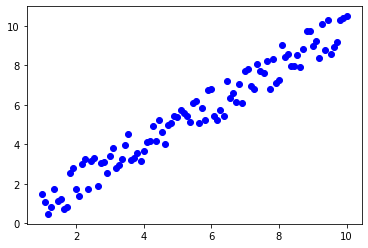

MSE: nan
learning rate = 0.1 and epochs = 1000


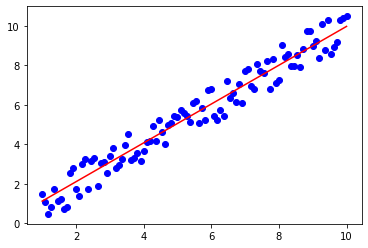

MSE: 0.3451363952874914
learning rate = 0.01 and epochs = 10


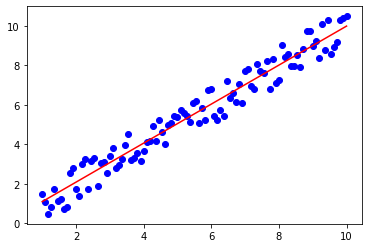

MSE: 0.3440173833912325
learning rate = 0.01 and epochs = 100


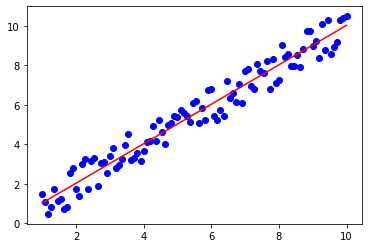

MSE: 0.3428079457238598
learning rate = 0.01 and epochs = 1000


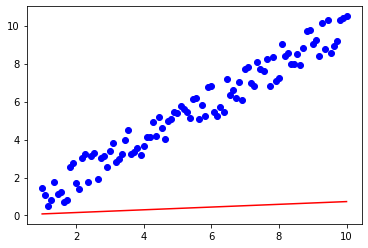

MSE: 33.01559636624549
learning rate = 0.0001 and epochs = 10


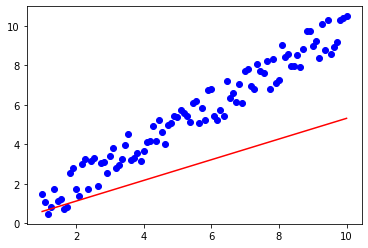

MSE: 8.633839387572245
learning rate = 0.0001 and epochs = 100


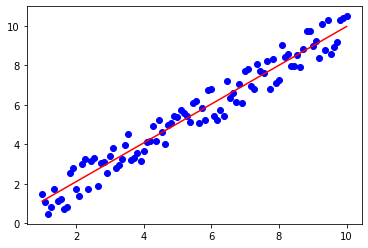

MSE: 0.3451291414810655
learning rate = 0.0001 and epochs = 1000


In [18]:
for learningrate in (0.1, 0.01, 0.0001):
    for epoch in (10, 100, 1000):
        m, b, cost = linear_regression(x, y, epochs=epoch, learning_rate=learningrate)

        y_pred = m * x + b

        plt.scatter(x, y, color='blue')
        plt.plot(x, y_pred, 'r-')
        plt.show()

        print('MSE: {}'.format(cost))
        print('learning rate =', learningrate, 'and epochs =', epoch )
        


# Задание 2

Подумайте, как применить написанную функцию линейной регрессии для аппроксимации следующего набора точек. Решите эту задачу. Выведите на экран итоговое приближение (график) и ошибку.

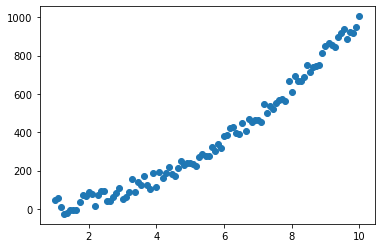

In [24]:
num_points = 100
m, b, delta = 10, 0, 50

x = np.linspace(1, 10, num_points)
y = m * x**2 + b + random.uniform(-delta, delta, num_points)

plt.scatter(x,y)

MSE: 775.6379966381413


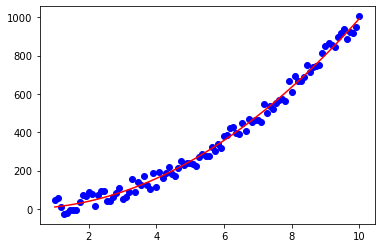

In [25]:
m, b, cost = linear_regression(x ** 2,y)

y_pred = m * x ** 2 + b

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, 'r-')

print('MSE: {}'.format(cost))

# Задание 3

Считайте файл weights_heights.csv

In [26]:
df = pd.read_csv('/Users/yanik/Downloads/weights_heights.csv')
df.head()

,Weight,Height
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


### Обучение и валидация модели.

Разобъем данные на тренировочную и валидационную часть и обучим линейную регрессию на тренировочной части (используйте функцию linear_regression для обучения)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Height'], df['Weight'], test_size=0.2)

m, b, cost = linear_regression(X_train, y_train, learning_rate=0.00001)

In [43]:
y_train

5648     65.54201
15077    65.95250
14248    67.09518
6982     64.80112
15136    67.53015
           ...   
23108    69.41269
14814    66.80862
3296     67.04642
1501     65.06775
23234    72.71908
Name: Weight, Length: 20000, dtype: float64

Сделаем предсказание на тренировочной и тестовой части по формуле y=mx+b.

Вычислим MSE на train и на test.

In [28]:
from sklearn.metrics import mean_squared_error

pred_train = m * X_train + b
pred_test = m * X_test + b

print("Train MSE: {}".format(mean_squared_error(y_train, pred_train)))
print("Test MSE: {}".format(mean_squared_error(y_test, pred_test)))

Train MSE: 30.428776845309436
Test MSE: 30.098083081867145


# Теперь проверим, как работает функция линейной регрессии из sklearn

In [31]:
from sklearn.linear_model import LinearRegression

X_train2 = X_train.values.reshape(-1,1)
X_test2 = X_test.values.reshape(-1,1)

lr = LinearRegression()
lr.fit(X_train2,y_train)

pred_train = lr.predict(X_train2)
pred_test = lr.predict(X_test2)

print("Train MSE: {}".format(mean_squared_error(y_train, pred_train)))
print("Test MSE: {}".format(mean_squared_error(y_test, pred_test)))

Train MSE: 2.683868085751435
Test MSE: 2.7736206091003566


In [33]:
X_train2

array([[131.28  ],
       [130.6652],
       [104.3434],
       ...,
       [127.3941],
       [124.4317],
       [134.6013]])

Посмотрим на качество линейной регрессии на кросс-валидации.

In [35]:
from sklearn.model_selection import cross_val_score

print(-cross_val_score(lr, df[['Height']], df['Weight'], cv=5, scoring='neg_mean_squared_error').mean())

2.7028607259823416


# Задание 4

Поработаем с датасетом Бостон.

In [36]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [37]:
X_full = data.data
y_full = data.target

y_full[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [40]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Переведём np.array X_full к типу dataframe, чтобы было удобнее дальше работать.

In [41]:
X_full = pd.DataFrame(data=X_full,
                      index=range(len(X_full)),
                      columns=data.feature_names)

Посмотрите на качество линейной регрессии (из sklearn) на кросс-валидации с тремя фолдами, измеряйте ошибку MSE.

In [46]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [49]:
#your code here

from sklearn.model_selection import cross_val_score

print(-cross_val_score(lr, X_full, y_full, cv=3, scoring='neg_mean_squared_error').mean())

169.0083123814603


Разбейте данные на train и test. Обучите линейную регрессию на train и сделайте предсказание на train и test.

Выведите MSE на train и на test.

In [63]:
#your code here
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print("Train MSE: {}".format(mean_squared_error(y_train, pred_train)))
print("Test MSE: {}".format(mean_squared_error(y_test, pred_test)))


Train MSE: 20.806163586210218
Test MSE: 27.578951576353028


Нарисуем матрицу корреляций признаков.

<AxesSubplot:>

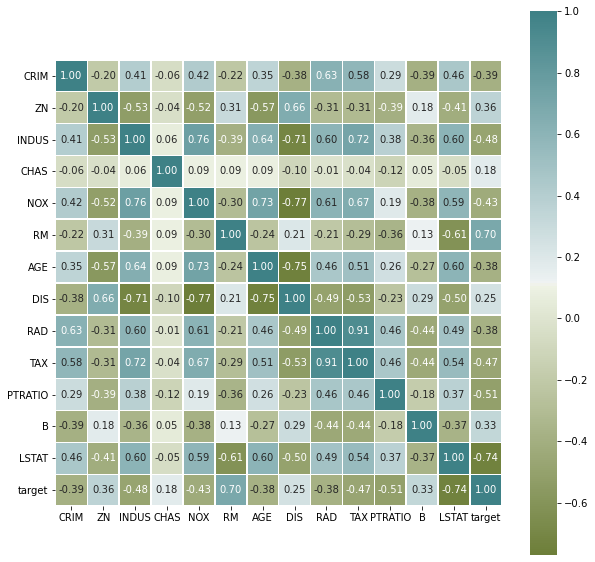

In [64]:
import seaborn as sns

data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])

plt.figure(figsize=(10,10))
corr = data1.corr()
sns.heatmap(corr,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200, as_cmap=True), square=True)

Попробуйте убрать из данных признаки с наименьшей корреляцией с target (1, 2 или 3 признака) и обучить линейную регрессию на оставшихся признаках. Как изменилось качество?

In [71]:
#your code here
X_full = X_full.drop(['CHAS', 'DIS'], axis=1)

KeyError: "['CHAS' 'DIS'] not found in axis"

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print("Train MSE: {}".format(mean_squared_error(y_train, pred_train)))
print("Test MSE: {}".format(mean_squared_error(y_test, pred_test)))


Train MSE: 25.21696514643283
Test MSE: 24.274231812261476


In [110]:
print(-cross_val_score(lr, X_full, y_full, cv=5, scoring='neg_mean_squared_error').mean())

39.96846620998584
